Преобразование таблицы с исправлением ошибок.

In [42]:
import pandas as pd

file_path = 'PathToFolder/data.xlsx'
data = pd.read_excel(file_path)

current_month_year = None
month_year_list = []

for index, row in data.iterrows():
    if pd.isna(row['client_id']) and pd.isna(row['sum']):
        current_month_year = row['status']
    month_year_list.append(current_month_year)

data['month_and_year'] = month_year_list

data_cleaned = data.dropna(subset=['client_id', 'sum'])

data_cleaned = data_cleaned.drop(columns=['Unnamed: 5'])

data_cleaned

,client_id,sum,status,sale,new/current,document,receiving_date,month_and_year
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021


1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [43]:
july_data = data_cleaned[data_cleaned['month_and_year'] == 'Июль 2021']

total_revenue_july = july_data['sum'].sum()

print(f"Ответ: {total_revenue_july}")

Ответ: 861874.1699999997


3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [44]:
september_data = data_cleaned[data_cleaned['month_and_year'] == 'Сентябрь 2021']

september_sales = september_data.groupby('sale')['sum'].sum()

top_manager = september_sales.idxmax()
top_sales = september_sales.max()

print(f"Ответ: {top_manager}. Количество денежных средств: {top_sales}")

Ответ: Смирнов. Количество денежных средств: 221525.7


4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [45]:
october_2021_data = data_cleaned[data_cleaned['month_and_year'] == 'Октябрь 2021']

october_2021_deal_counts = october_2021_data['new/current'].value_counts()

predominant_deal_type_october_2021 = october_2021_deal_counts.idxmax()

print(f"Ответ: {predominant_deal_type_october_2021}.")

Ответ: текущая.


5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [46]:
data_cleaned['receiving_date'] = data_cleaned['receiving_date'].astype(str)

june_deals = data_cleaned[data_cleaned['month_and_year'] == 'Июнь 2021']

june_deals_received_in_may = june_deals[june_deals['receiving_date'].str.contains('2021-05', na=False)]

original_docs_received_in_may = june_deals_received_in_may[june_deals_received_in_may['document'] == 'оригинал']

original_docs_count_corrected = original_docs_received_in_may.shape[0]

print(f"Ответ: {original_docs_count_corrected}.")

Ответ: 1.


2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

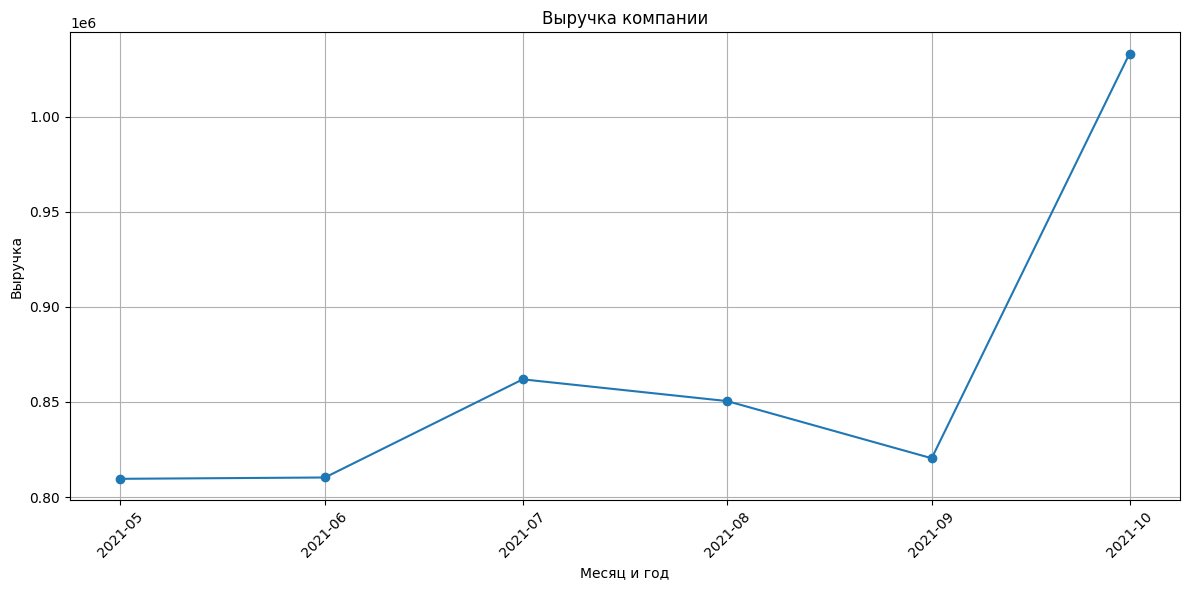

In [47]:
import matplotlib.pyplot as plt

month_translation = {
    'Январь': 'January', 'Февраль': 'February', 'Март': 'March', 'Апрель': 'April',
    'Май': 'May', 'Июнь': 'June', 'Июль': 'July', 'Август': 'August',
    'Сентябрь': 'September', 'Октябрь': 'October', 'Ноябрь': 'November', 'Декабрь': 'December'
}

data_cleaned['month_and_year'] = data_cleaned['month_and_year'].apply(
    lambda x: ' '.join([month_translation.get(x.split()[0], x.split()[0]), x.split()[1]])
)

data_cleaned['month_and_year'] = pd.to_datetime(data_cleaned['month_and_year'], format='%B %Y')

monthly_revenue = data_cleaned.groupby('month_and_year')['sum'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month_and_year'], monthly_revenue['sum'], marker='o')
plt.title('Выручка компании')
plt.xlabel('Месяц и год')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()